#Exploratory data analysis

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [25]:
df = pd.read_csv("SWaT_Dataset_Attack_v0.csv")
df.head()

,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,P201,P202,P203,P204,P205,P206,DPIT301,FIT301,LIT301,MV301,MV302,MV303,MV304,P301,P302,AIT401,AIT402,FIT401,LIT401,P401,P402,P403,P404,UV401,AIT501,AIT502,AIT503,AIT504,FIT501,FIT502,FIT503,FIT504,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
0,28/12/2015 10:00:00 AM,2.427057,522.8467,2,2,1,262.0161,8.396437,328.6337,2.445391,2,1,1,2,1,2,1,19.74838,2.206835,956.1651,1,2,1,1,1,2,148.808,156.0882,1.713517,942.0662,1,2,1,1,2,7.878621,145.1166,264.5475,12.03538,1.723789,1.279621,0.735269,0.307786,2,1,250.8652,1.649953,189.5988,0.000128,1,1,1,Normal
1,28/12/2015 10:00:01 AM,2.446274,522.8860,2,2,1,262.0161,8.396437,328.6337,2.445391,2,1,1,2,1,2,1,19.74838,2.208244,956.1651,1,2,1,1,1,2,148.808,156.0882,1.715952,942.0277,1,2,1,1,2,7.878621,145.1166,264.5475,12.03538,1.723789,1.297554,0.735269,0.307786,2,1,250.8652,1.649953,189.6789,0.000128,1,1,1,Normal
2,28/12/2015 10:00:02 AM,2.489191,522.8467,2,2,1,262.0161,8.394514,328.6337,2.442316,2,1,1,2,1,2,1,19.69076,2.208628,956.4855,1,2,1,1,1,2,148.808,156.0882,1.715952,941.8739,1,2,1,1,2,7.878621,145.1166,264.5475,12.03538,1.723404,1.293967,0.735269,0.308619,2,1,250.8812,1.649953,189.6789,0.000128,1,1,1,Normal
3,28/12/2015 10:00:03 AM,2.534350,522.9645,2,2,1,262.0161,8.394514,328.6337,2.442316,2,1,1,2,1,2,1,19.69076,2.208628,956.8060,1,2,1,1,1,2,148.808,156.0882,1.714670,941.7970,1,2,1,1,2,7.878621,145.0141,264.5475,12.03538,1.723404,1.281158,0.735269,0.308619,2,1,250.8812,1.649953,189.6148,0.000128,1,1,1,Normal
4,28/12/2015 10:00:04 AM,2.569260,523.4748,2,2,1,262.0161,8.394514,328.6337,2.443085,2,1,1,2,1,2,1,19.69076,2.208628,957.0864,1,2,1,1,1,2,148.808,156.0882,1.714670,942.2200,1,2,1,1,2,7.878621,144.8859,264.5475,12.03538,1.723404,1.281158,0.735269,0.308619,2,1,250.8812,1.649953,189.5027,0.000128,1,1,1,Normal


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449919 entries, 0 to 449918
Data columns (total 53 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0    Timestamp     449919 non-null  object 
 1   FIT101         449919 non-null  float64
 2   LIT101         449919 non-null  float64
 3    MV101         449919 non-null  int64  
 4   P101           449919 non-null  int64  
 5   P102           449919 non-null  int64  
 6    AIT201        449919 non-null  float64
 7   AIT202         449919 non-null  float64
 8   AIT203         449919 non-null  float64
 9   FIT201         449919 non-null  float64
 10   MV201         449919 non-null  int64  
 11   P201          449919 non-null  int64  
 12   P202          449919 non-null  int64  
 13  P203           449919 non-null  int64  
 14   P204          449919 non-null  int64  
 15  P205           449919 non-null  int64  
 16  P206           449919 non-null  int64  
 17  DPIT301        449919 non-nul

In [10]:
cols = df.columns
cols

Index(['FIT101', 'LIT101', ' MV101', 'P101', 'P102', ' AIT201', 'AIT202',
       'AIT203', 'FIT201', ' MV201', ' P201', ' P202', 'P203', ' P204', 'P205',
       'P206', 'DPIT301', 'FIT301', 'LIT301', 'MV301', 'MV302', ' MV303',
       'MV304', 'P301', 'P302', 'AIT401', 'AIT402', 'FIT401', 'LIT401', 'P401',
       'P402', 'P403', 'P404', 'UV401', 'AIT501', 'AIT502', 'AIT503', 'AIT504',
       'FIT501', 'FIT502', 'FIT503', 'FIT504', 'P501', 'P502', 'PIT501',
       'PIT502', 'PIT503', 'FIT601', 'P601', 'P602', 'P603', 'Normal/Attack'],
      dtype='object')

In [26]:
# convert normal and attack innto binary variable
df['Normal/Attack'].replace('Normal', 0, inplace=True)
df['Normal/Attack'].replace('Attack', 1, inplace=True)

In [27]:
df['Normal/Attack'].value_counts()

0    395298
1     54621
Name: Normal/Attack, dtype: int64

We can see that the dataset is highly imbalanced.

In [28]:
#removing the time stamp column
df.drop(' Timestamp', axis = 1, inplace=True)

Getting the dependent (y) and independent (X) variables seprated

In [29]:
y = df['Normal/Attack']
X_df = df.iloc[:, :-1]

Taking out the numerical observations and trying to see their distributions

In [30]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,P201,P202,P203,P204,P205,P206,DPIT301,FIT301,LIT301,MV301,MV302,MV303,MV304,P301,P302,AIT401,AIT402,FIT401,LIT401,P401,P402,P403,P404,UV401,AIT501,AIT502,AIT503,AIT504,FIT501,FIT502,FIT503,FIT504,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
0,2.427057,522.8467,2,2,1,262.0161,8.396437,328.6337,2.445391,2,1,1,2,1,2,1,19.74838,2.206835,956.1651,1,2,1,1,1,2,148.808,156.0882,1.713517,942.0662,1,2,1,1,2,7.878621,145.1166,264.5475,12.03538,1.723789,1.279621,0.735269,0.307786,2,1,250.8652,1.649953,189.5988,0.000128,1,1,1,0
1,2.446274,522.8860,2,2,1,262.0161,8.396437,328.6337,2.445391,2,1,1,2,1,2,1,19.74838,2.208244,956.1651,1,2,1,1,1,2,148.808,156.0882,1.715952,942.0277,1,2,1,1,2,7.878621,145.1166,264.5475,12.03538,1.723789,1.297554,0.735269,0.307786,2,1,250.8652,1.649953,189.6789,0.000128,1,1,1,0
2,2.489191,522.8467,2,2,1,262.0161,8.394514,328.6337,2.442316,2,1,1,2,1,2,1,19.69076,2.208628,956.4855,1,2,1,1,1,2,148.808,156.0882,1.715952,941.8739,1,2,1,1,2,7.878621,145.1166,264.5475,12.03538,1.723404,1.293967,0.735269,0.308619,2,1,250.8812,1.649953,189.6789,0.000128,1,1,1,0
3,2.534350,522.9645,2,2,1,262.0161,8.394514,328.6337,2.442316,2,1,1,2,1,2,1,19.69076,2.208628,956.8060,1,2,1,1,1,2,148.808,156.0882,1.714670,941.7970,1,2,1,1,2,7.878621,145.0141,264.5475,12.03538,1.723404,1.281158,0.735269,0.308619,2,1,250.8812,1.649953,189.6148,0.000128,1,1,1,0
4,2.569260,523.4748,2,2,1,262.0161,8.394514,328.6337,2.443085,2,1,1,2,1,2,1,19.69076,2.208628,957.0864,1,2,1,1,1,2,148.808,156.0882,1.714670,942.2200,1,2,1,1,2,7.878621,144.8859,264.5475,12.03538,1.723404,1.281158,0.735269,0.308619,2,1,250.8812,1.649953,189.5027,0.000128,1,1,1,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f311dac4250>,
      dtype=object)

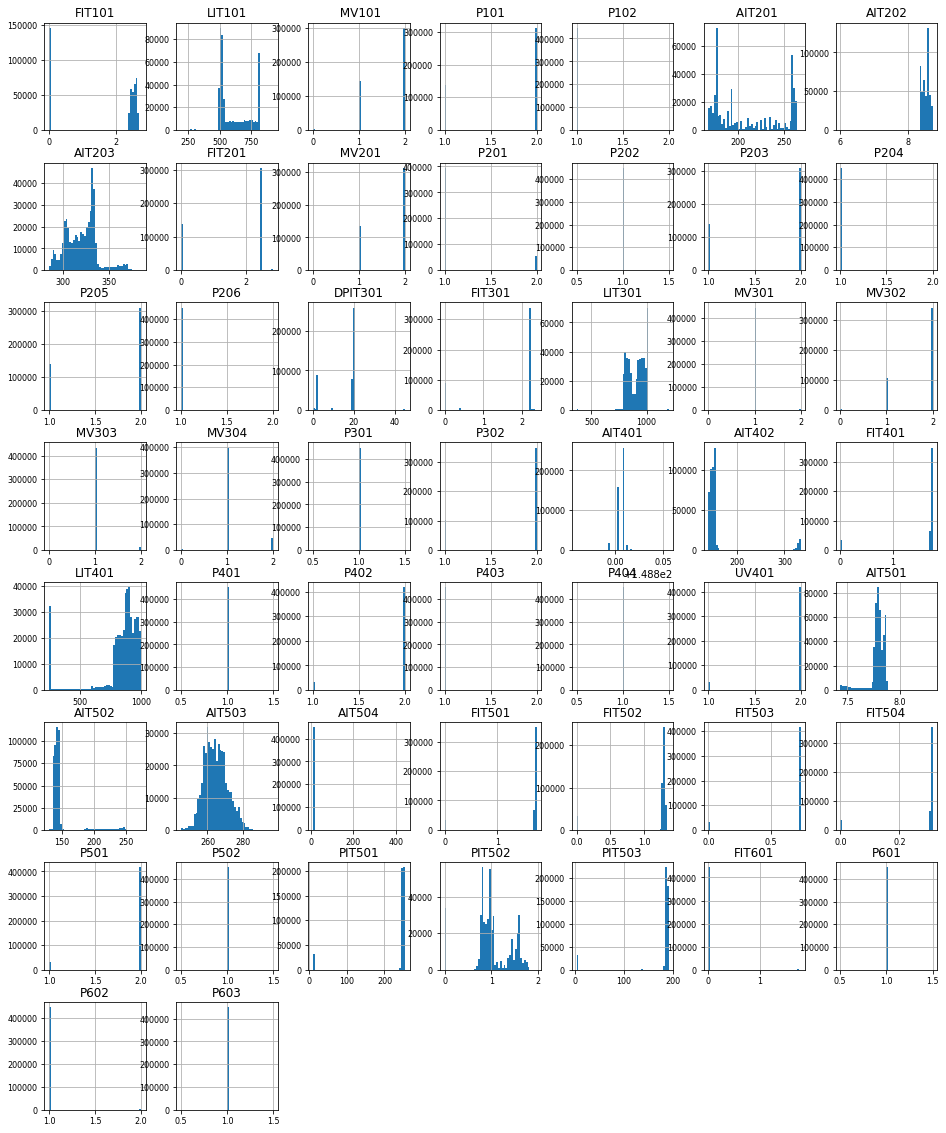

In [18]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [35]:
df_num_corr = df_num.corr()['Normal/Attack'][:-1] 
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(golden_features_list), golden_features_list))

There is 15 strongly correlated values with SalePrice:
AIT402    0.737683
AIT502    0.707564
MV304     0.609133
AIT501   -0.577902
LIT401   -0.670578
P402     -0.743164
FIT502   -0.752143
PIT503   -0.753205
FIT501   -0.753403
PIT501   -0.755207
P501     -0.757980
UV401    -0.758003
FIT503   -0.758781
FIT504   -0.761722
FIT401   -0.763314
Name: Normal/Attack, dtype: float64


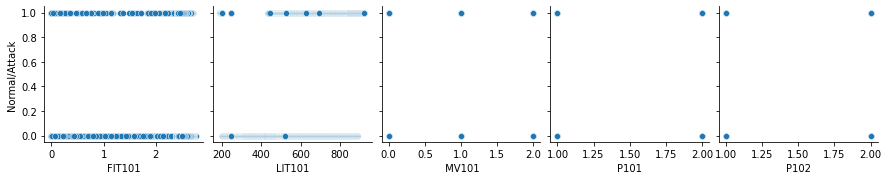

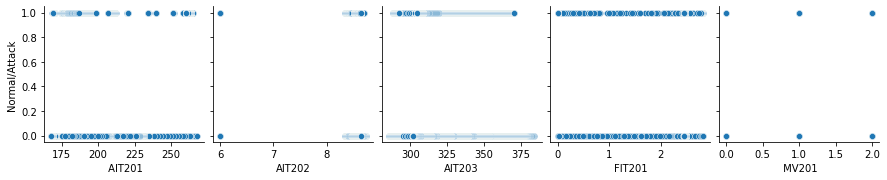

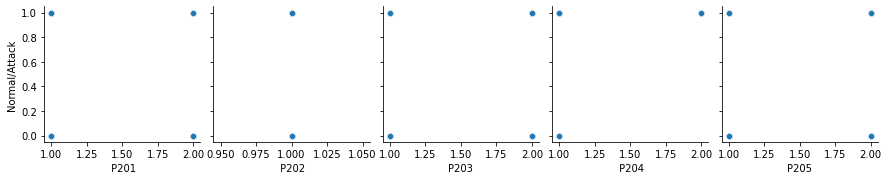

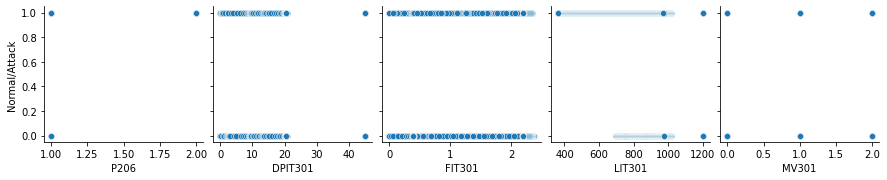

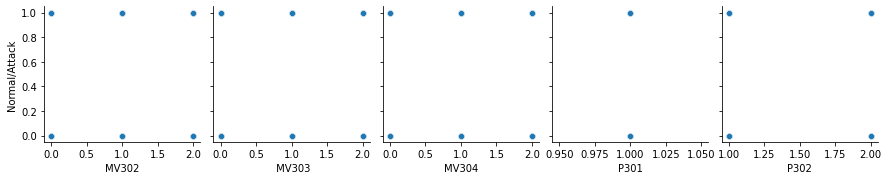

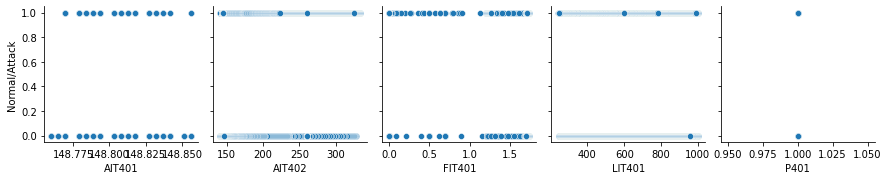

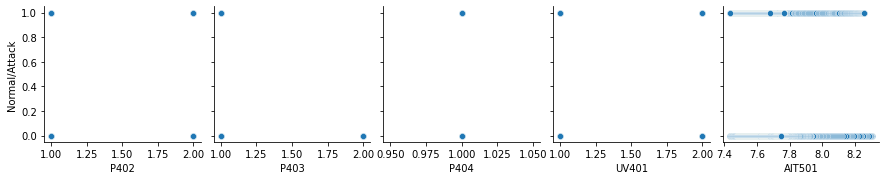

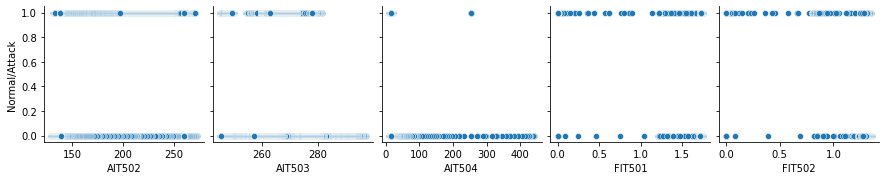

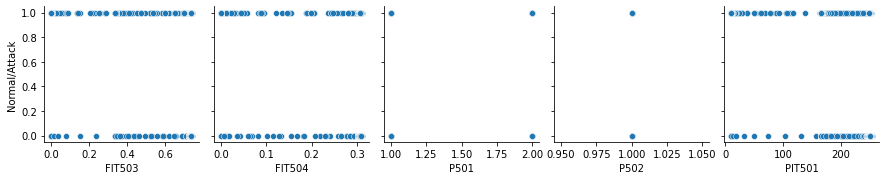

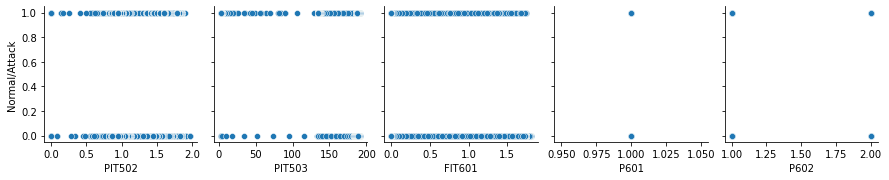

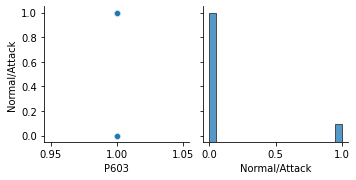

In [36]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['Normal/Attack'])